Project Domain : 
Clustering Option (Unsupervised): Group customers, behaviours, or products based on similarity (K-Means, DBSCAN, Hierarchical)

Step 1: Problem Understanding & Framing
Problem Statement:
	Group users into distinct segments based on their viewing behavior, patterns and demographics using unsupervised clustering techniques.
Task Type:
	Clustering (Unsupervised Learning): Group customers, behaviours, or products based on similarity (K-Means, DBSCAN, Hierarchical)
Target Metric:
	Silhouette Score which measures how well each data point fits within its cluster. Higher score indicates better cluster separation.
	Elbow Method for choosing number of clusters.
Business KPIs (Impact Metrics): 
	Customer Engagement - increase monthly active sessions per customer (%)
	Marketing cost reduction – targeted and segment based campaigns (%)

Step 2: Data Collection & Understanding 
Manually downloaded Netflix 2025:User Behavior Dataset (210K+ Records) in https://www.kaggle.com/datasets

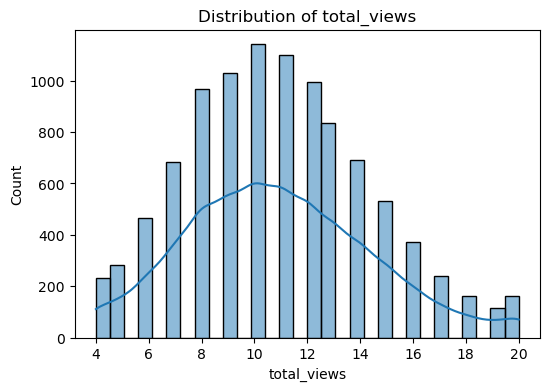

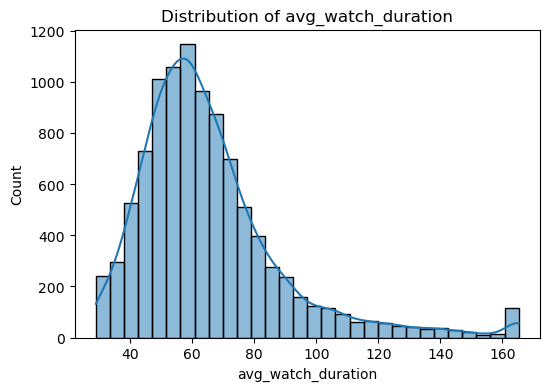

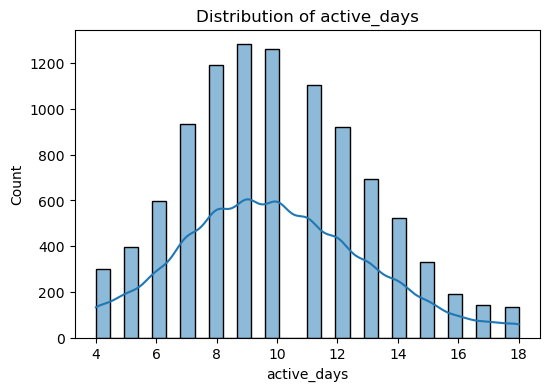

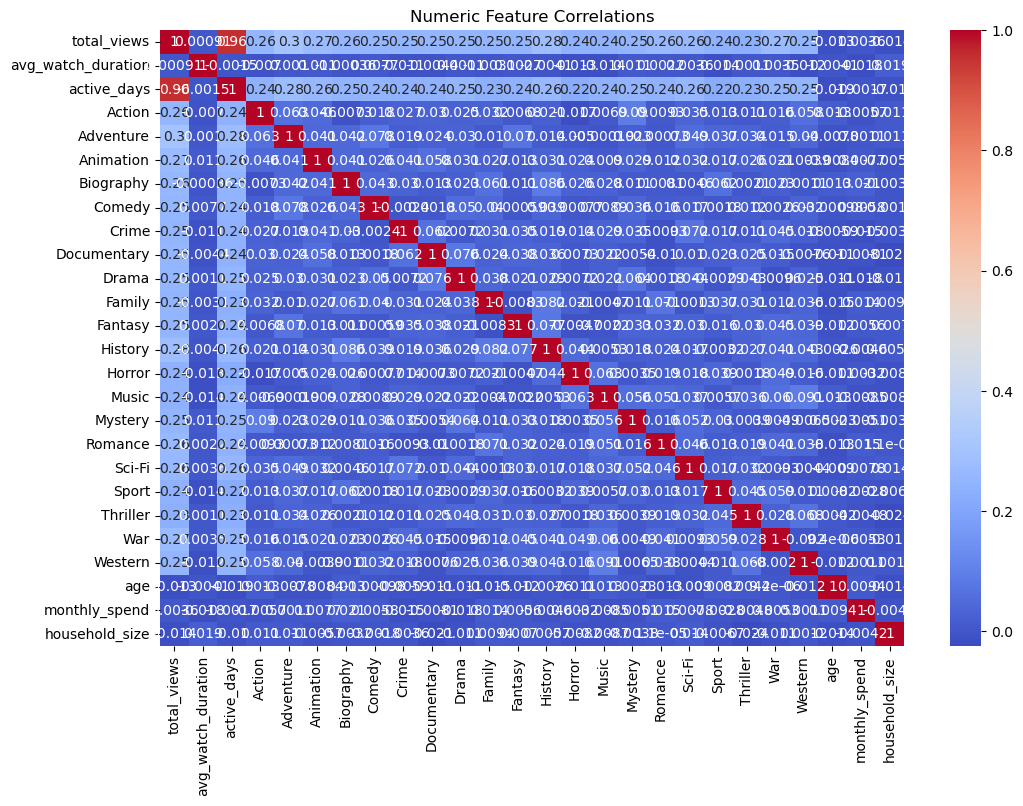

Selected features: Index(['total_views', 'avg_watch_duration', 'active_days', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'age',
       'is_active', 'monthly_spend', 'household_size',
       'first_name_Christopher', 'first_name_David', 'first_name_James',
       'first_name_Jennifer', 'first_name_Jessica', 'first_name_John',
       'first_name_Matthew', 'first_name_Michael', 'first_name_Robert',
       'first_name_William', 'last_name_Brown', 'last_name_Johnson',
       'last_name_Jones', 'last_name_Smith', 'last_name_Williams',
       'gender_Male', 'gender_Other', 'gender_Prefer not to say',
       'gender_Unknown', 'country_USA', 'state_province_Arizona',
       'state_province_British Columbia', 'state_province_California',
       'state_province_Florida', 'state_province_Georgia',
       'sta

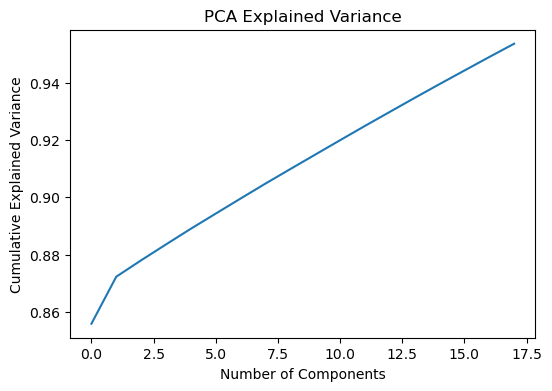

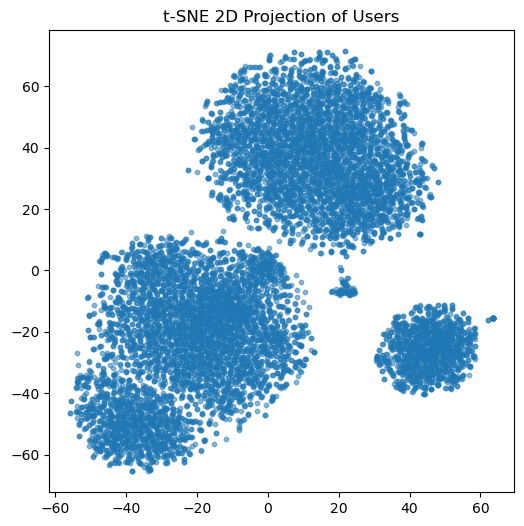

Top contributing features to variance:
monthly_spend         3.397756
Romance               3.239948
household_size        3.236592
Horror                3.054893
age                   3.012705
Crime                 2.935055
Comedy                2.880637
Thriller              2.877499
avg_watch_duration    2.842587
Sport                 2.826144
dtype: float64


Step 4: Model Implementation


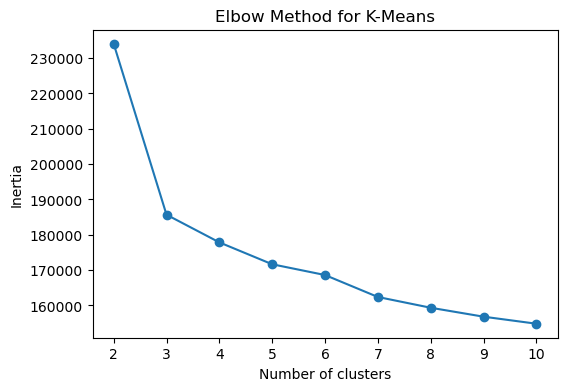

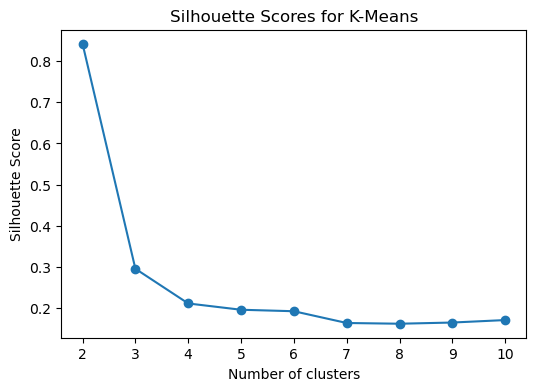

Best K (Silhouette): 2
K-Means Silhouette Score: 0.8419838636582283
DBSCAN Silhouette Score: -1
DBSCAN clusters (incl noise): [-1]
Hierarchical Silhouette Score: 0.8419838636582283


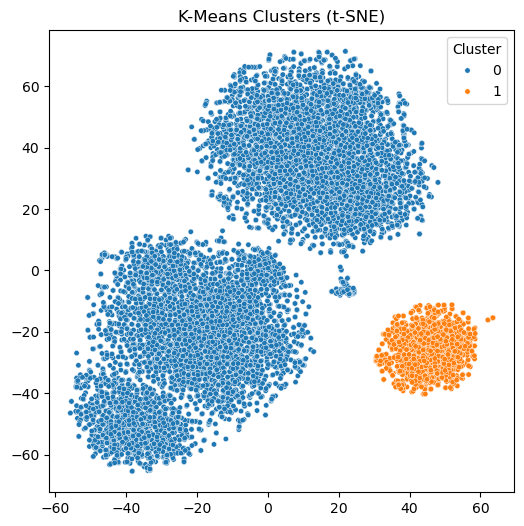

          Model  Silhouette Score
0       K-Means          0.841984
1        DBSCAN         -1.000000
2  Hierarchical          0.841984
                total_views  avg_watch_duration  active_days    Action  \
cluster_kmeans                                                           
0                 10.904484           65.632227     9.923025  0.741993   
1                 11.000000           64.675914    10.029973  0.742053   

                Adventure  Animation  Biography    Comedy     Crime  \
cluster_kmeans                                                        
0                1.027981   0.811102   0.778065  0.761996  0.725924   
1                1.053588   0.850136   0.736603  0.754768  0.761126   

                Documentary  ...   Mystery   Romance    Sci-Fi     Sport  \
cluster_kmeans               ...                                           
0                  0.704911  ...  0.621081  0.750646  0.866951  0.590066   
1                  0.675749  ...  0.603996  0.770209  

In [20]:
#https://github.com/louangelineobjero-personal/AIM_CapstoneProject_Netflix_Clustering_UnsupervisedLearning.git
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score


print("Project Domain : \nClustering Option (Unsupervised): Group customers, behaviours, or products based on similarity (K-Means, DBSCAN, Hierarchical)")
print("\nStep 1: Problem Understanding & Framing")
print("Problem Statement:\n\tGroup users into distinct segments based on their viewing behavior, patterns and demographics using unsupervised clustering techniques.")
print("Task Type:\n\tClustering (Unsupervised Learning): Group customers, behaviours, or products based on similarity (K-Means, DBSCAN, Hierarchical)")
print("Target Metric:\n\tSilhouette Score which measures how well each data point fits within its cluster. Higher score indicates better cluster separation.\n\tElbow Method for choosing number of clusters.")
print("Business KPIs (Impact Metrics): \n\tCustomer Engagement - increase monthly active sessions per customer (%)\n\tMarketing cost reduction – targeted and segment based campaigns (%)")


#Step 2: Data Collection & Understanding
print("\nStep 2: Data Collection & Understanding \nManually downloaded Netflix 2025:User Behavior Dataset (210K+ Records) in https://www.kaggle.com/datasets/sayeeduddin/netflix-2025user-behavior-dataset-210k-records")
print("FILES: users.csv,watch_history.csv,movies.csv\n")
#Load Data
users = pd.read_csv("/Users/louangelineobjero/Desktop/AIMS FILES/CAPSTONE/archive/users.csv")
watch_history = pd.read_csv("/Users/louangelineobjero/Desktop/AIMS FILES/CAPSTONE/archive/watch_history.csv")
movies = pd.read_csv("/Users/louangelineobjero/Desktop/AIMS FILES/CAPSTONE/archive/movies.csv")

#Combine genres into one column
movies['genre_combined'] = movies[['genre_primary','genre_secondary']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

#Merge watch history with movie info
watch_merged = watch_history.merge(movies[['movie_id','genre_combined']],how='left',left_on='movie_id',right_on='movie_id')

#Convert timestamps to datetime
watch_merged['watch_date'] = pd.to_datetime(watch_merged['watch_date'])

#Aggregate features per user
user_features = watch_merged.groupby('user_id').agg(total_views = ('movie_id', 'count'),avg_watch_duration = ('watch_duration_minutes', 'mean'),active_days = ('watch_date', lambda x: x.nunique())).reset_index()

# Split combined genres into lists
watch_merged['genre_list'] = watch_merged['genre_combined'].str.split(',')
watch_exploded = watch_merged.explode('genre_list')

# Count how many times each genre is watched per user
genre_counts = watch_exploded.pivot_table(index='user_id',columns='genre_list',values='movie_id',aggfunc='count',fill_value=0).reset_index()
user_features = user_features.merge(genre_counts, on='user_id', how='left')

#Merge with user demographics
user_features = user_features.merge(users, on='user_id', how='left')

print(user_features.head())
print(user_features.info())
print(user_features.shape)
print(user_features.isnull().sum())

print("\nStep 3: Data Preprocessing, Applied EDA & Feature Engineering ")

#Clean Data
numeric_cols = user_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = user_features.select_dtypes(include=['object']).columns.tolist()

# Numeric: fill with media
user_features[numeric_cols] = user_features[numeric_cols].fillna(user_features[numeric_cols].median())
# Categorical: fill with 'Unknown'
user_features[categorical_cols] = user_features[categorical_cols].fillna('Unknown')

#Remove duplicates
user_features = user_features.drop_duplicates(subset='user_id')

#Handle outliers (clip top/bottom 1%)
for col in ['total_views', 'avg_watch_duration', 'active_days']:
    lower = user_features[col].quantile(0.01)
    upper = user_features[col].quantile(0.99)
    user_features[col] = user_features[col].clip(lower, upper)

#Engineer features

#Encode categorical features
user_features_encoded = pd.get_dummies(user_features, columns=categorical_cols, drop_first=True)

#Scale numeric features
scaler = StandardScaler()
user_features_encoded[numeric_cols] = scaler.fit_transform(user_features_encoded[numeric_cols])

#domain-derived feature example
genre_cols = [c for c in user_features_encoded.columns if c not in numeric_cols and 'user_id' not in c]
if genre_cols:
    user_features_encoded['top_genre_pct'] = user_features_encoded[genre_cols].max(axis=1) / (user_features_encoded['total_views'] + 1e-6)

#Applied EDA (Exploratory Data Analysis)

for col in ['total_views','avg_watch_duration','active_days']:
    plt.figure(figsize=(6,4))
    sns.histplot(user_features[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(user_features[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()


#Feature selection: 

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
cols_to_drop = ['user_id'] if 'user_id' in user_features_encoded.columns else []

selector = VarianceThreshold(threshold=0.01)
user_features_selected = selector.fit_transform(user_features_encoded.drop(columns=cols_to_drop))

selected_features = user_features_encoded.drop(columns=cols_to_drop).columns[selector.get_support()]
print("Selected features:", selected_features)

#Dimensionality reduction:

#PCA
pca = PCA(n_components=0.95)  # retain 95% variance
user_features_pca = pca.fit_transform(user_features_selected)
print("\n\nPCA reduced shape:", user_features_pca.shape)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

#t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
user_features_tsne = tsne.fit_transform(user_features_selected)

plt.figure(figsize=(6,6))
plt.scatter(user_features_tsne[:,0], user_features_tsne[:,1], s=10, alpha=0.5)
plt.title("t-SNE 2D Projection of Users")
plt.show()

#Feature Importance : PCA loadings
pca_loadings = pd.DataFrame(pca.components_.T, index=selected_features)
top_features = pca_loadings.abs().sum(axis=1).sort_values(ascending=False)
print("Top contributing features to variance:")
print(top_features.head(10))

print("\n\nStep 4: Model Implementation")

X = user_features_pca  # Use PCA-reduced features

# Elbow Method
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

# Silhouette Scores
sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(6,4))
plt.plot(K, sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means')
plt.show()

best_k = K[np.argmax(sil_scores)]
print("Best K (Silhouette):", best_k)

#Train Final K-Means Model
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
user_features['cluster_kmeans'] = kmeans_final.fit_predict(X)

kmeans_silhouette = silhouette_score(X, user_features['cluster_kmeans'])
print("K-Means Silhouette Score:", kmeans_silhouette)

#DBSCAN Clustering

dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

user_features['cluster_dbscan'] = dbscan_labels

# Ignore noise points (-1)
if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) < len(dbscan_labels):
    dbscan_silhouette = silhouette_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
else:
    dbscan_silhouette = -1

print("DBSCAN Silhouette Score:", dbscan_silhouette)
print("DBSCAN clusters (incl noise):", np.unique(dbscan_labels))

#Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
hier_labels = hierarchical.fit_predict(X)

user_features['cluster_hierarchical'] = hier_labels
hier_silhouette = silhouette_score(X, hier_labels)

print("Hierarchical Silhouette Score:", hier_silhouette)

#Cluster Visualization (t-SNE)
plt.figure(figsize=(6,6))
sns.scatterplot(
    x=user_features_tsne[:,0],
    y=user_features_tsne[:,1],
    hue=user_features['cluster_kmeans'],
    palette='tab10',
    s=15
)
plt.title("K-Means Clusters (t-SNE)")
plt.legend(title='Cluster')
plt.show()

#Model Comparison (Deliverable)
model_comparison = pd.DataFrame({'Model': ['K-Means', 'DBSCAN', 'Hierarchical'],'Silhouette Score': [kmeans_silhouette,dbscan_silhouette,hier_silhouette]})

print(model_comparison)


#Cluster Profiling (Business Insight)
cluster_profile = user_features.groupby('cluster_kmeans')[numeric_cols].mean()
print(cluster_profile)

#Reproducibility (Save Models & Artefacts)
joblib.dump(kmeans_final, "/Users/louangelineobjero/Documents/GitHub/Netflix_Clustering_UnsupervisedLearning/models/kmeans_model.pkl")
joblib.dump(scaler, "/Users/louangelineobjero/Documents/GitHub/Netflix_Clustering_UnsupervisedLearning/models/scaler.pkl")
joblib.dump(pca, "/Users/louangelineobjero/Documents/GitHub/Netflix_Clustering_UnsupervisedLearning/models/pca.pkl")

model_comparison.to_csv("/Users/louangelineobjero/Documents/GitHub/Netflix_Clustering_UnsupervisedLearning/models/model_comparison.csv", index=False)
user_features.to_csv("/Users/louangelineobjero/Documents/GitHub/Netflix_Clustering_UnsupervisedLearning/models/user_clusters.csv", index=False)


print("\n Step 5: Critical Thinking → Ethical AI & Bias Auditing")
print("The problem aims to group Netflix users into distinct segments based on viewing behavior and engagement patterns using an unsupervised clustering.K-Means is well-suited to solve the problem as it is fully unsupervised, produces clear and discrete segments for business interpretability and supports Silhouette & Elbow metrics. With the use of PCA to make distance-based clustering meaningful and retain 95% of the variance before clustering. This preprocessing step ensures that Euclidean distance, which K-Means relies on, remains meaningful and stable.")
print("\nModel Limitations & Risks\n")
print ("1.Data Imbalance - Heavy users dominate the dataset and cann cause clusters to center around power users. With this, casual users may be underrepresented.")
print("2.Overfitting (Structural) - High-dimensional genre features and this is mitigated via VarianceThreshold,PCA (95% variance) and Silhouette-based model selection.")
print("3.Clusters indirectly encode sensitive attributes\n")

print("\nBias & Fairness Audit: Gender vs Cluster Assignment")
gender_cluster_dist = pd.crosstab(
    user_features['gender'],
    user_features['cluster_kmeans'],
    normalize='index'
)
print(gender_cluster_dist)

print("\n")
cluster_probs = pd.crosstab(user_features['gender'], user_features['cluster_kmeans'], normalize='index')
# Check ratio between groups
demographic_parity = cluster_probs.max(axis=0) / cluster_probs.min(axis=0)
print(demographic_parity)

print("\nPropose Mitigations\n")
print("\tReweighting - Assign slightly higher weights to minority gender groups when applying PCA or K-Means, so they are proportionally represented in clusters.")
print("\tThresholds - Ensure no group exceeds or falls below a certain percentage in any clusters.")
print("\tAugmentation - Apply techniques such as oversampling behavioral patterns of underrepresented users.")
print("\tPost-Processing - Implement human checks before deploying segments")

In [19]:
#https://github.com/louangelineobjero-personal/AIM_CapstoneProject_Netflix_Clustering_UnsupervisedLearning.git